In [20]:
from sklearn.datasets import make_blobs 

import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 

# use Seaborn plotting defaults 
import seaborn as sns
sns.set()

# Motivating SVM

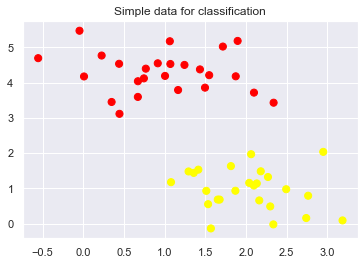

In [21]:
# generate 2 clusters of random data 
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title('Simple data for classification')
plt.show()

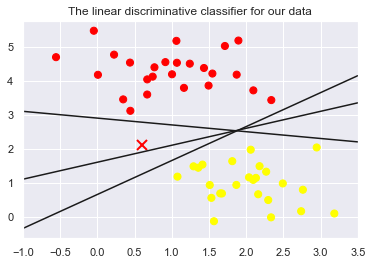

In [22]:
# draw straight line separating the two classes 
# problem: there's more than one possible dividing line that can perfectly separate two classes 

xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)   # plot a point 

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    plt.plot(xfit, m * xfit + b, '-k')      # draw different straight line 
    
plt.title('The linear discriminative classifier for our data')
plt.xlim(-1, 3.5)
plt.show()

# SVM: Maximizing the Margin 

The intuition of SVM:
rather than simply drawing a zero-width line between the classes, we can draw
around each line a *margin* of some width, up to the nearest point.

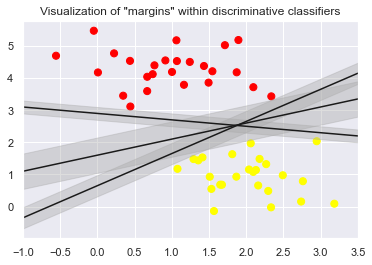

In [23]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
    
plt.title('Visualization of "margins" within discriminative classifiers')
plt.xlim(-1, 3.5)
plt.show()

- In SVM, the line that maximizes this margin is the one we will choose as the optimal model. 
- SVM are an example of such a *maximum margin* estimator.

## Fitting a SVM 

In [24]:
from sklearn.svm import SVC         # support vector classifier 

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [25]:
# create a quick utility function that will plot SVM decision boundaries 

def plot_svc_decision(model, ax=None, plot_support=True, draw_circles=True): 
    """Utility function to plot the decision boundaries for a 2D SVC.
    """
    
    if ax is None: 
        ax = plt.gca()
    
    # get x limit and y limit 
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins 
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors 
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1], 
                   s=300, linewidth=1, facecolors='none')
        
    if draw_circles: 
        for sv in model.support_vectors_: 
            plt.plot(sv[0], sv[1], 'o', ms=17, mec='black', mfc='none', mew=1)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

A SVM classifier fit to the data, with margins (dashed line) and support vectors (circles):


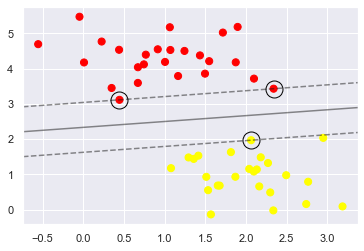

In [26]:
print('''A SVM classifier fit to the data, with margins (dashed line) and support vectors (circles):''')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(model)
plt.show()

In [27]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

NOTE: 
- Only the position of the support vectors contribute to the fit. 
- Any points further from the margin that are on the correct side do not modify the fit! This is because these points do not contribute to the loss function.

Illustration:

In [28]:
def plot_svm(N=10, ax=None): 
    """Plot SVM classifier given the firt N samples of the same 200 data samples. 
    """
    
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision(model, ax)

The influence of new training points on the SVM model:


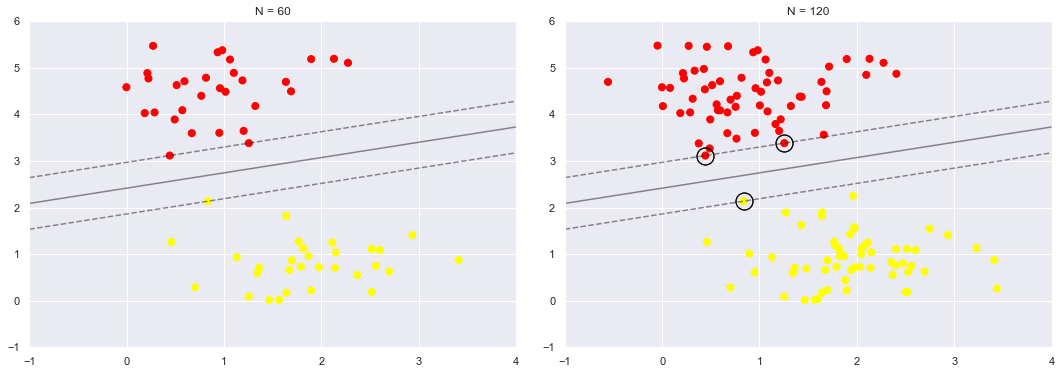

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

print('The influence of new training points on the SVM model:')
for ax, N in zip(axes, [60, 120]): 
    plot_svm(N, ax)
    ax.set_title(f'N = {N}')
    

plt.show()

In [30]:
from ipywidgets import interact, fixed 


interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## Kernel SVM:: Beyond linear boundaries 

Learn a suitable nonlinear decision boundary.

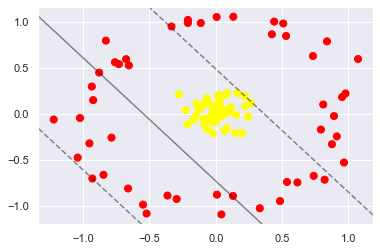

In [31]:
from sklearn.datasets import make_circles 


X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf, plot_support=False, draw_circles=False)

In [32]:
# compute a radial basis function centered on the middle clump 
r = np.exp(-(X ** 2).sum(1))

In [33]:
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30, X=X, y=y): 
    
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

In [34]:
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), 
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.00534835e-02, -1.05685616e-01],
       [-2.12496658e-01, -1.15114671e-01],
       [ 8.77181451e-01, -3.32199784e-01],
       [-2.94931239e-01, -9.27446403e-01],
       [-4.25631204e-02, -4.07844925e-02],
       [ 8.40002034e-01,  7.84765709e-01],
       [-9.31173147e-01, -7.04769855e-01],
       [ 5.09972995e-01,  9.78676459e-01],
       [ 1.06866860e-01,  2.34616286e-02],
       [ 5.38199350e-01, -7.41743661e-01],
       [-6.55540615e-01,  5.23564322e-01],
       [ 8.92776407e-01, -2.67510288e-02],
       [-6.82607631e-02,  1.64980239e-01],
       [ 1.32905598e-01,  1.05208086e+00],
       [ 2.64224466e-01,  1.15613521e-01],
       [ 2.85029420e-02,  1.28094402e-01],
       [-2.10059328e-01,  9.84526924e-01],
       [-8.79558932e-01,  4.45894600e-01],
       [-1.45010079e-01,  1.07557485e-01],
       [ 2.14069025e-02, -9.83857950e-03],
       [-7.86319202e-01, -2.60563905e-01],
       [ 9.68229650e-01, -5.31064996e-01],
       

In [35]:
# apply kernelized SVM by changing linear kernel to an RBF kernel 
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Kernel SVM fit to the data:


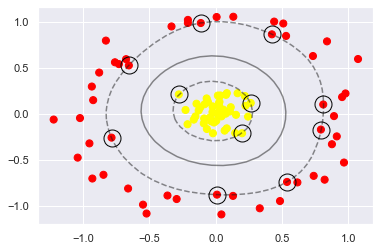

In [38]:
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='autumn')

print('Kernel SVM fit to the data:')
plot_svc_decision(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolor='none')

## Tuning the SVM: Softening margins 

Used when decision boundary is not linearly separable.

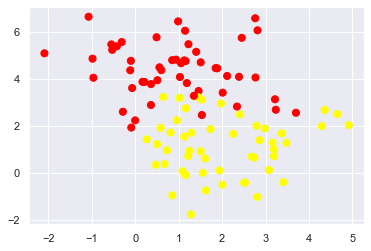

In [41]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

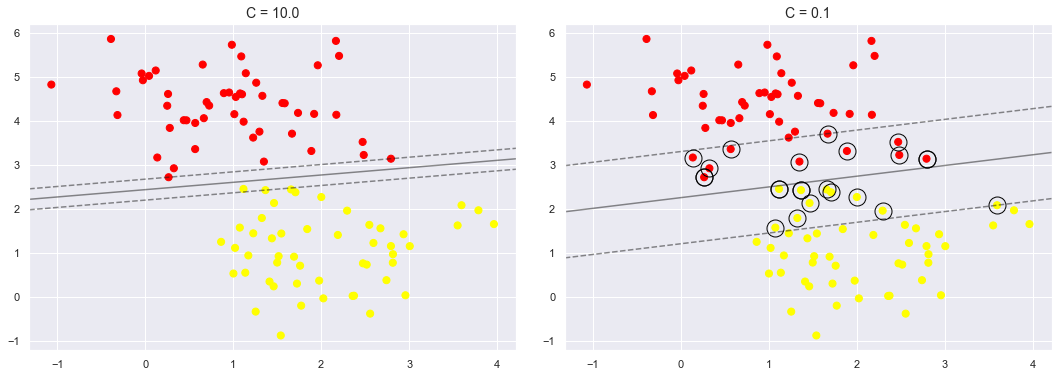

In [42]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for ax, C in zip(axes, [10.0, 0.1]): 
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision(model, ax)
    
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
               s=300, lw=1, facecolors='none')
    ax.set_title('C = {0:.1f}'.format(C), size=14)